<h1>Importing modules from packages</h1>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import requests
import io

<h1>Importing the Iris-dataset</h1>

In [2]:
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"
response=requests.get(url).content
iris=pd.read_csv(io.StringIO(response.decode('utf-8')))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
print (iris.shape)

(150, 5)


In [7]:
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [8]:
print(iris.species.value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


Very balanced dataset

<h1>Visualization</h1>

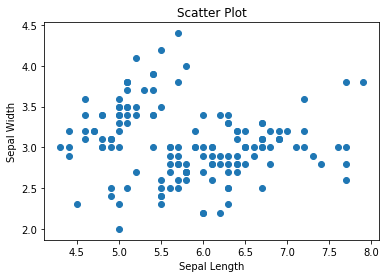

In [15]:
plt.scatter(iris.sepal_length,iris.sepal_width)
plt.title("Scatter Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

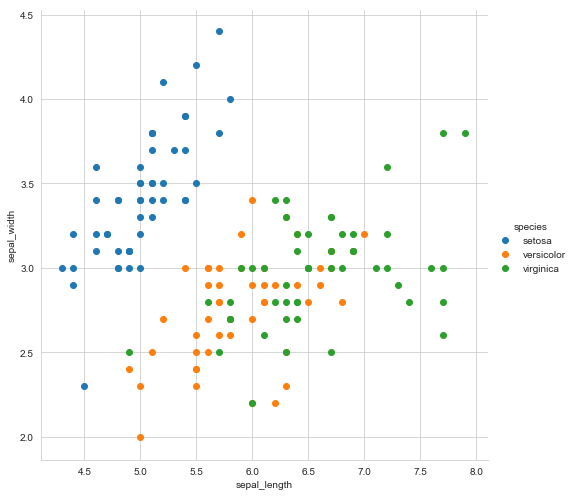

In [32]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='species',height=7).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

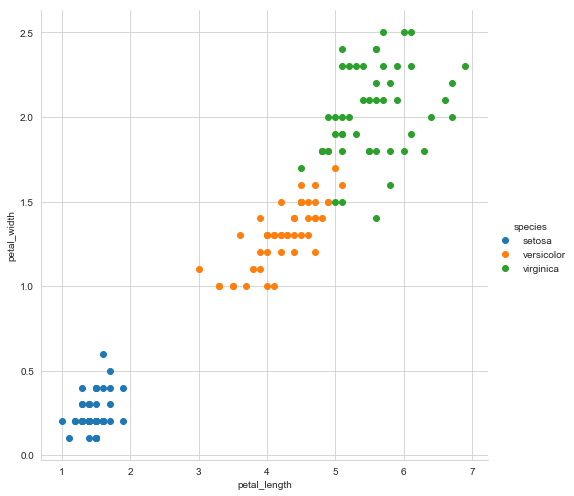

In [33]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=7)\
.map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()
plt.close()

[]

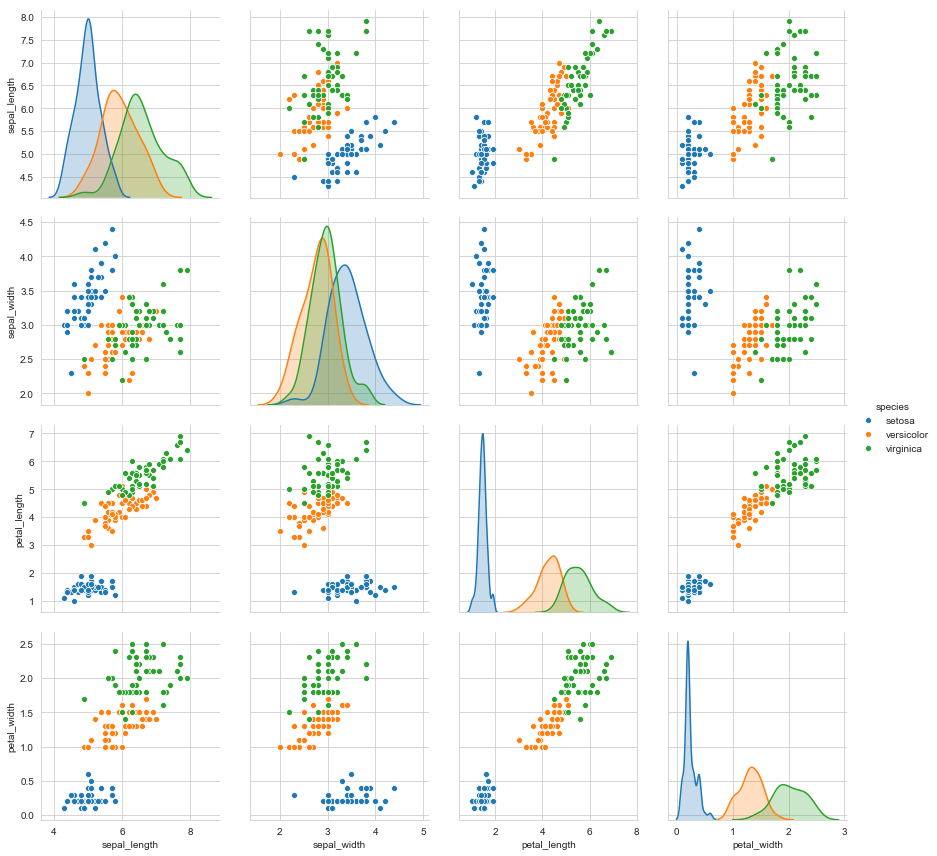

In [38]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3)
plt.plot()

<h1>Basic conditons for predictions</h1>

In [45]:
g=iris.groupby('species')
for species,df in g:
    print(species)
    print(df)

setosa
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8  

In [53]:
mask=iris.species=="setosa"
iris[mask].petal_width.max()
print(iris[mask].petal_length.max(),iris[mask].petal_length.min(),iris[mask].petal_width.max(),iris[mask].petal_width.min())

1.9 1.0 0.6 0.1


In [52]:
#if petal_length>=1 and petal_length<=1.9 and petal_width>=0.1 and petal_width<=0.6 then classify it as setosa ..... conclusion 1

mask=iris.species=="versicolor"
print(iris[mask].petal_length.max(),iris[mask].petal_length.min(),iris[mask].petal_width.max(),iris[mask].petal_width.min())

5.1 3.0 1.8 1.0


In [51]:
#if petal_length>=3 and petal_length<=5.1 and petal_width>=1 and petal_width<=1.8 then classify it as versicolor ..... conclusion 2
mask=iris.species=="virginica"
print(iris[mask].petal_length.max(),iris[mask].petal_length.min(),iris[mask].petal_width.max(),iris[mask].petal_width.min())

6.9 4.5 2.5 1.4


In [ ]:
#if petal_length>=4.5 and petal_length<=6.9 and petal_width>=1.4 and petal_width<=2.5 then classify it as virginica ..... conclusion 3

<h1>Observations</h1>
<ul style="list-style-type:circle">
<li>if petal_length>=1 and petal_length<=1.9 and petal_width>=0.1 and petal_width<=0.6 then classify it as setosa</li>
<li>if petal_length>=3 and petal_length<=5.1 and petal_width>=1 and petal_width<=1.8 then classify it as versicolor</li>
<li>if petal_length>=4.5 and petal_length<=6.9 and petal_width>=1.4 and petal_width<=2.5 then classify it as virginica</li>

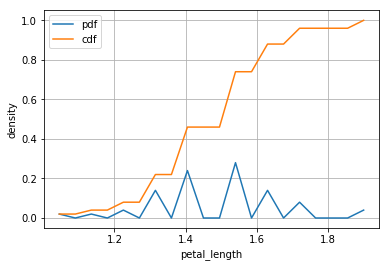

In [64]:
setosa = iris[iris['species']=='setosa']
count,bin_element = np.histogram(setosa['petal_length'],bins=20,density=True)
pdf=count/sum(count)
plt.plot(bin_element[1:],pdf,label="pdf")
cdf=np.cumsum(pdf)
plt.xlabel('petal_length')
plt.ylabel('density')
plt.plot(bin_element[1:],cdf,label="cdf")
plt.legend()
plt.grid()
plt.show()
plt.close()

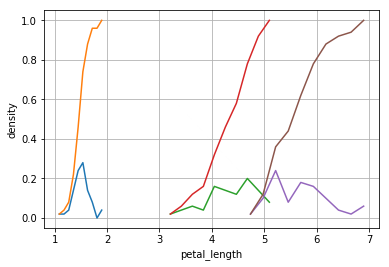

In [65]:
counts,elements=np.histogram(iris[iris['species']=='setosa']['petal_length'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(elements[1:],pdf)
plt.plot(elements[1:],cdf)
counts,elements=np.histogram(iris[iris['species']=='versicolor']['petal_length'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(elements[1:],pdf)
plt.plot(elements[1:],cdf)
counts,elements=np.histogram(iris[iris['species']=='virginica']['petal_length'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(elements[1:],pdf)
plt.plot(elements[1:],cdf)
plt.grid()
plt.xlabel('petal_length')
plt.ylabel('density')
plt.show()

# Box ploting

[]

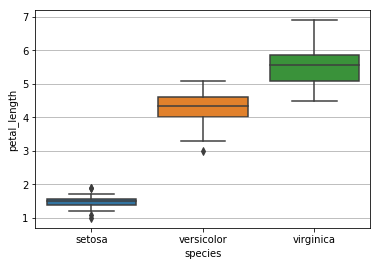

In [14]:
sns.boxplot(data=iris,x="species",y="petal_length")
ax=plt.gca()
ax.yaxis.grid(True)
plt.plot()

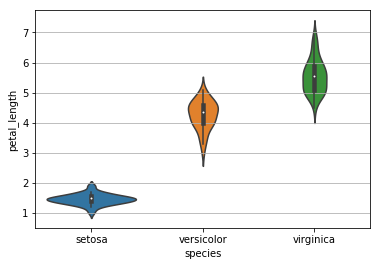

In [19]:
sns.violinplot(data=iris[['species','petal_length']],x="species",y="petal_length")
ax=plt.gca()
ax.yaxis.grid()
plt.show()